##Group_11##

Group_Member_1:  Anurag Choudhury (202318059)

Group_Member_2: Aditya Tripathi (202318046)

Group_Member_3: Karan Sharma (202318018)



#Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.cluster import hierarchy

In [4]:
df=pd.read_csv('Election_data.csv')

In [5]:
df.head()

,State / UT,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestants,No. Of Transgender Contestants,Total number of contestents,Elected Male Candidates,...,Female Electors Who Voted,Total Votes Polled,Male Polling Percentage Excluding Postal Ballots,Female Polling Percentage Excluding Postal Ballots,State Poll perc,No of Polling Stations,Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA
0,Chhattisgarh,2023,10,29,90,1025,155,1.0,1181,71,...,7813.2,15666.5,76.3,76.2,76.8,24137,846,103861,9732,197678.0
1,Karnataka,2023,36,15,224,2429,185,1.0,2615,214,...,19191.1,39229.9,73.6,72.7,73.8,58534,908,372516,49280,269764.0
2,Madhya Pradesh,2023,35,47,230,2281,252,1.0,2534,203,...,20690.3,43580.9,78.0,76.1,77.7,64626,867,386479,46125,427710.0
3,Meghalaya,2023,0,55,60,339,36,0.0,375,57,...,958.9,1891.8,83.1,87.2,86.8,3482,626,35260,2510,14952.0
4,Mizoram,2023,0,39,40,156,18,0.0,174,37,...,356.7,705.1,79.0,81.3,82.3,1276,672,17726,843,2779.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   State / UT                                          100 non-null    object 
 1   Year of GE to SLA                                   100 non-null    int64  
 2   Reserved SC Seats                                   100 non-null    int64  
 3   Reserved ST Seats                                   100 non-null    int64  
 4   Total No. of Seats                                  100 non-null    int64  
 5   No. Of Male Contestants                             100 non-null    int64  
 6   No. Of Female Contestants                           100 non-null    int64  
 7   No. Of Transgender Contestants                      83 non-null     float64
 8   Total number of contestents                         100 non-null    int64  
 9   

In [7]:
df.shape

(100, 33)

In [8]:
df.isnull()

,State / UT,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestants,No. Of Transgender Contestants,Total number of contestents,Elected Male Candidates,...,Female Electors Who Voted,Total Votes Polled,Male Polling Percentage Excluding Postal Ballots,Female Polling Percentage Excluding Postal Ballots,State Poll perc,No of Polling Stations,Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
96,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
97,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
98,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [9]:
null_values = df.isnull().sum()

null_values

State / UT                                             0
Year of GE to SLA                                      0
Reserved SC Seats                                      0
Reserved ST Seats                                      0
Total No. of Seats                                     0
No. Of Male Contestants                                0
No. Of Female Contestants                              0
No. Of Transgender Contestants                        17
Total number of contestents                            0
Elected Male Candidates                                0
Elected Female Candidates                              0
Elected Transgender Candidates                        17
Total number of Candidates                             0
Elected Female perc                                    0
Forfeited Deposits Male                                0
Forfeited Deposits Female                              0
Forfeited Deposits Transgender                        17
Total Deposits                 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   State / UT                                          100 non-null    object 
 1   Year of GE to SLA                                   100 non-null    int64  
 2   Reserved SC Seats                                   100 non-null    int64  
 3   Reserved ST Seats                                   100 non-null    int64  
 4   Total No. of Seats                                  100 non-null    int64  
 5   No. Of Male Contestants                             100 non-null    int64  
 6   No. Of Female Contestants                           100 non-null    int64  
 7   No. Of Transgender Contestants                      83 non-null     float64
 8   Total number of contestents                         100 non-null    int64  
 9   

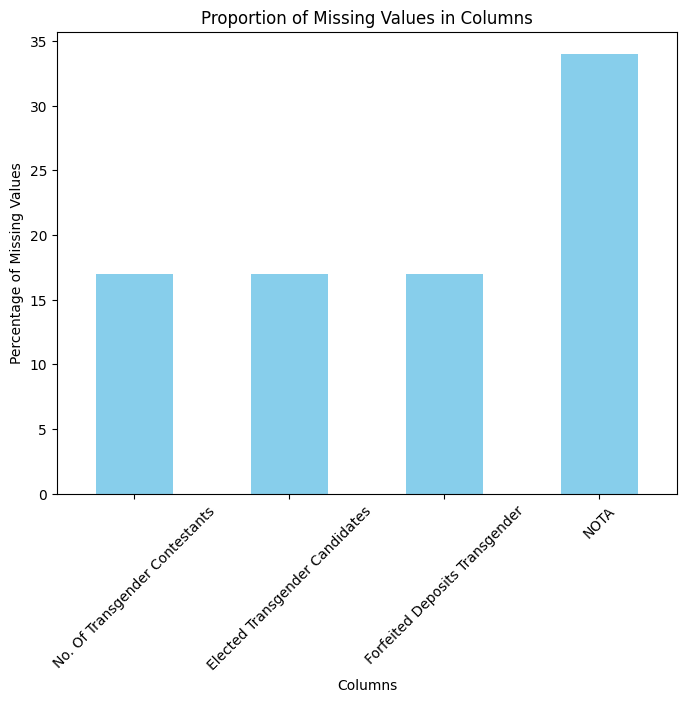

In [11]:
columns_with_missing_values = ['No. Of Transgender Contestants',
                                'Elected Transgender Candidates',
                                'Forfeited Deposits Transgender',
                               'NOTA']

missing_values_proportion = df[columns_with_missing_values].isnull().mean() * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
missing_values_proportion.plot(kind='bar', color='skyblue')
plt.title('Proportion of Missing Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.show()

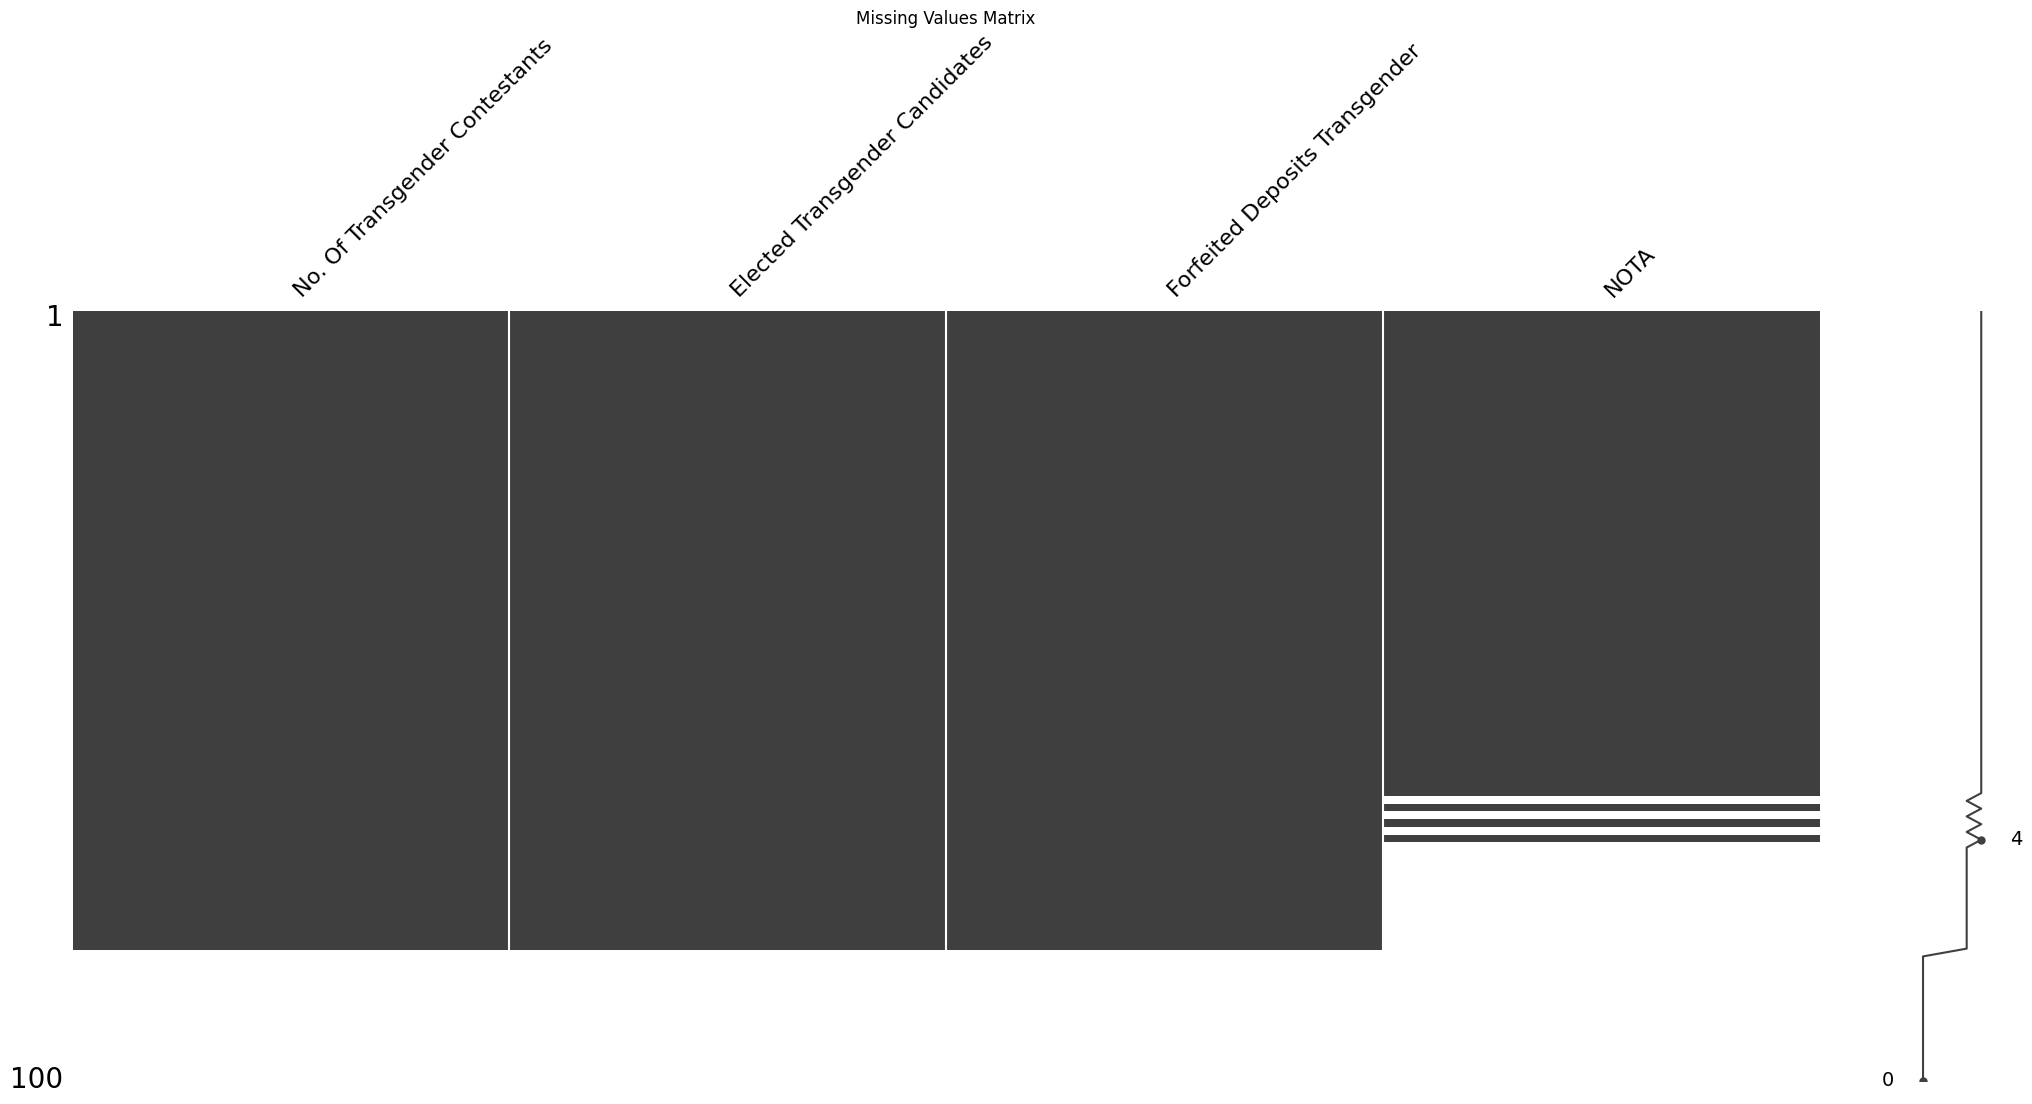

In [12]:

# Visualize missing values matrix
msno.matrix(df[columns_with_missing_values])
plt.title('Missing Values Matrix')
plt.show()


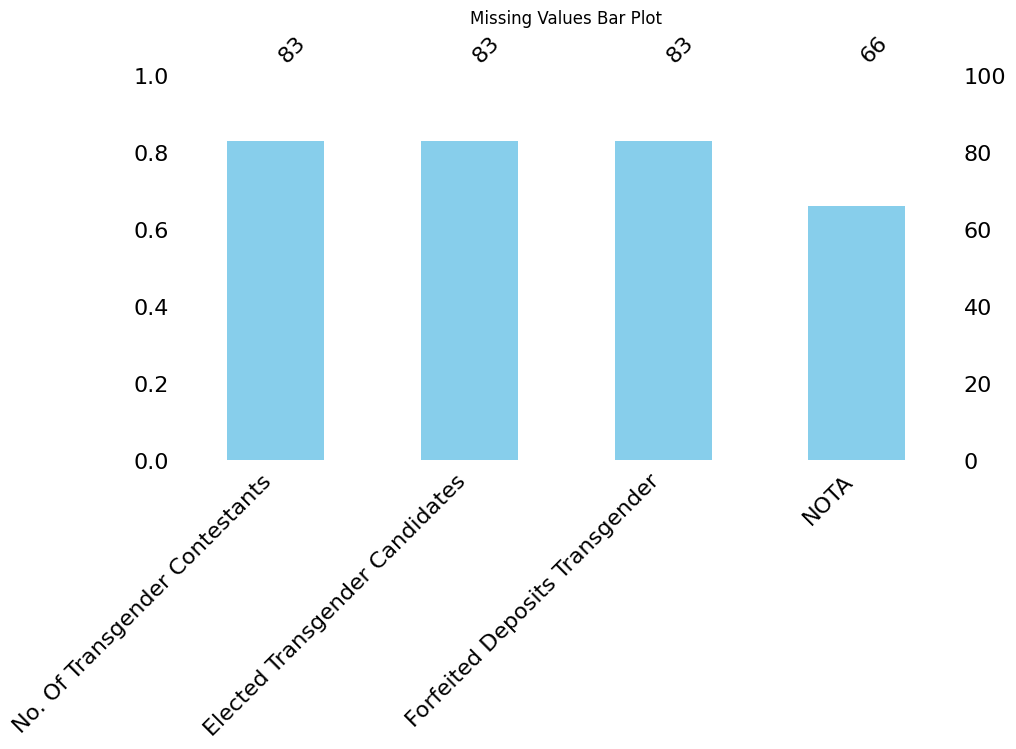

In [13]:
# Visualize missing values bar plot
msno.bar(df[columns_with_missing_values], color='skyblue', figsize=(10, 5))
plt.title('Missing Values Bar Plot')
plt.show()


In [55]:
# Create SimpleImputer object with strategy='median'
imp_median = SimpleImputer(strategy='median')

# Define columns to impute
columns_to_impute = ['No. Of Transgender Contestants', 'Elected Transgender Candidates', 'Forfeited Deposits Transgender', 'NOTA']

# Fit and transform the specified columns using SimpleImputer
df[columns_to_impute] = imp_median.fit_transform(df[columns_to_impute])

In [15]:
null_values = df.isnull().sum()

null_values

State / UT                                            0
Year of GE to SLA                                     0
Reserved SC Seats                                     0
Reserved ST Seats                                     0
Total No. of Seats                                    0
No. Of Male Contestants                               0
No. Of Female Contestants                             0
No. Of Transgender Contestants                        0
Total number of contestents                           0
Elected Male Candidates                               0
Elected Female Candidates                             0
Elected Transgender Candidates                        0
Total number of Candidates                            0
Elected Female perc                                   0
Forfeited Deposits Male                               0
Forfeited Deposits Female                             0
Forfeited Deposits Transgender                        0
Total Deposits                                  

In [16]:
df.head(10)

,State / UT,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestants,No. Of Transgender Contestants,Total number of contestents,Elected Male Candidates,...,Female Electors Who Voted,Total Votes Polled,Male Polling Percentage Excluding Postal Ballots,Female Polling Percentage Excluding Postal Ballots,State Poll perc,No of Polling Stations,Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA
0,Chhattisgarh,2023,10,29,90,1025,155,1.0,1181,71,...,7813.2,15666.5,76.3,76.2,76.8,24137,846,103861,9732,197678.0
1,Karnataka,2023,36,15,224,2429,185,1.0,2615,214,...,19191.1,39229.9,73.6,72.7,73.8,58534,908,372516,49280,269764.0
2,Madhya Pradesh,2023,35,47,230,2281,252,1.0,2534,203,...,20690.3,43580.9,78.0,76.1,77.7,64626,867,386479,46125,427710.0
3,Meghalaya,2023,0,55,60,339,36,0.0,375,57,...,958.9,1891.8,83.1,87.2,86.8,3482,626,35260,2510,14952.0
4,Mizoram,2023,0,39,40,156,18,0.0,174,37,...,356.7,705.1,79.0,81.3,82.3,1276,672,17726,843,2779.0
5,Nagaland,2023,0,59,60,180,4,0.0,184,58,...,571.0,1150.0,84.6,87.8,88.1,2291,570,24514,1905,3512.0
6,Rajasthan,2023,34,25,200,1692,183,0.0,1875,180,...,18919.4,39874.6,74.2,74.7,75.3,52139,1015,466943,39112,383107.0
7,Telangana,2023,19,12,119,2067,222,1.0,2290,109,...,11674.3,23474.3,71.0,71.6,72.0,35655,915,212363,11852,171953.0
8,Tripura,2023,10,20,60,229,30,0.0,259,51,...,1249.4,2537.8,85.7,89.3,89.8,3337,847,67422,3598,34449.0
9,Goa,2022,1,0,40,275,26,0.0,301,37,...,484.1,953.7,78.2,81.0,81.9,1722,676,26828,3229,10629.0


#Exploratory Data Analysis

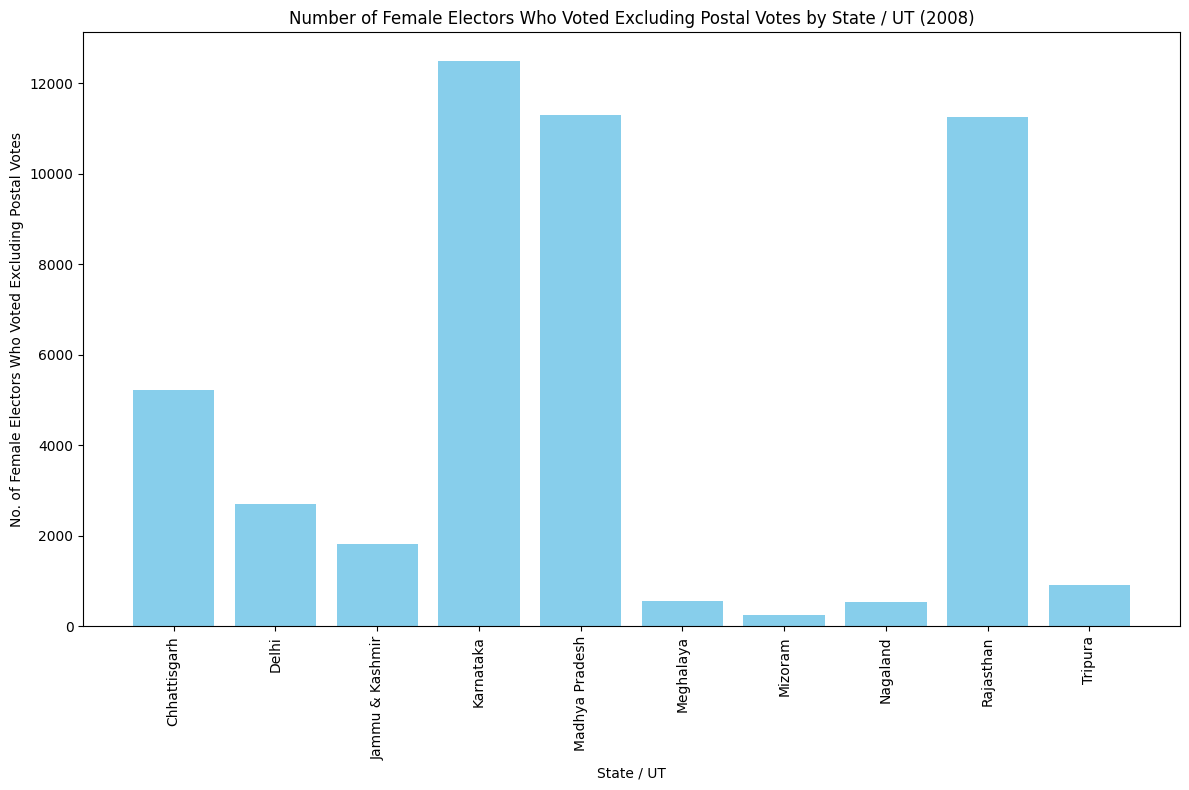

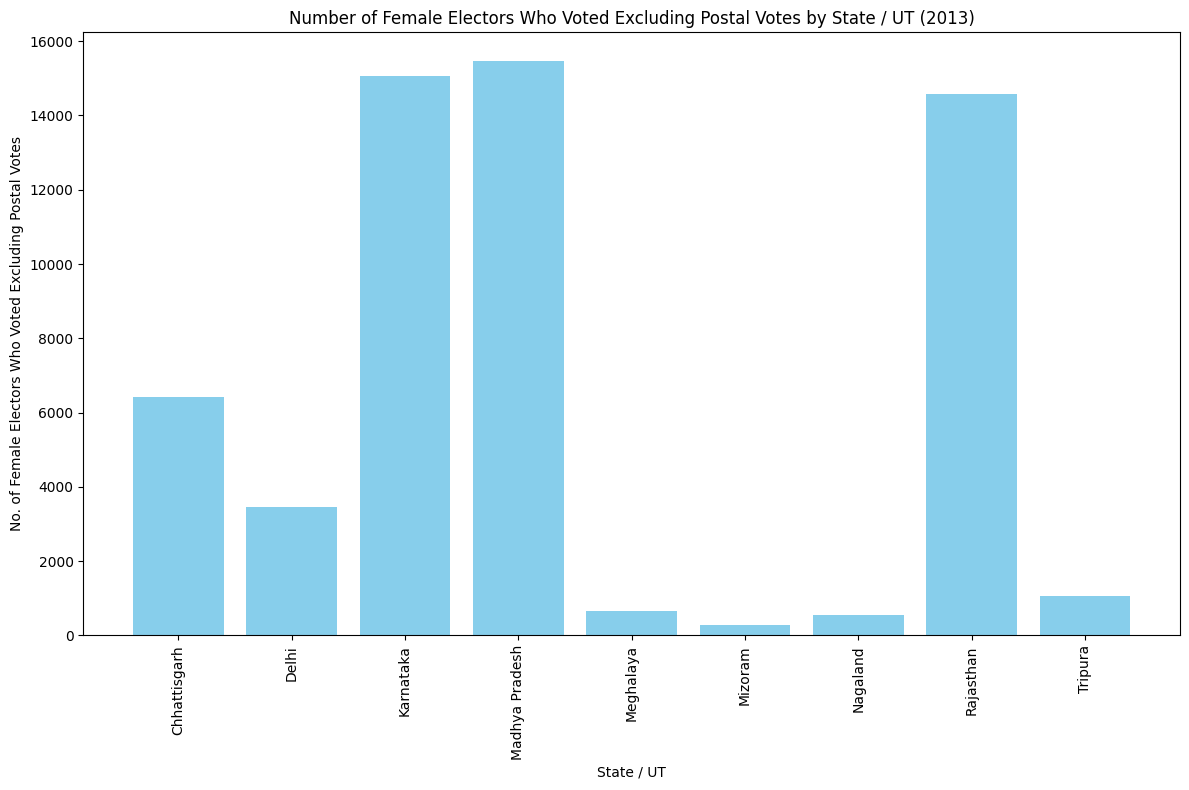

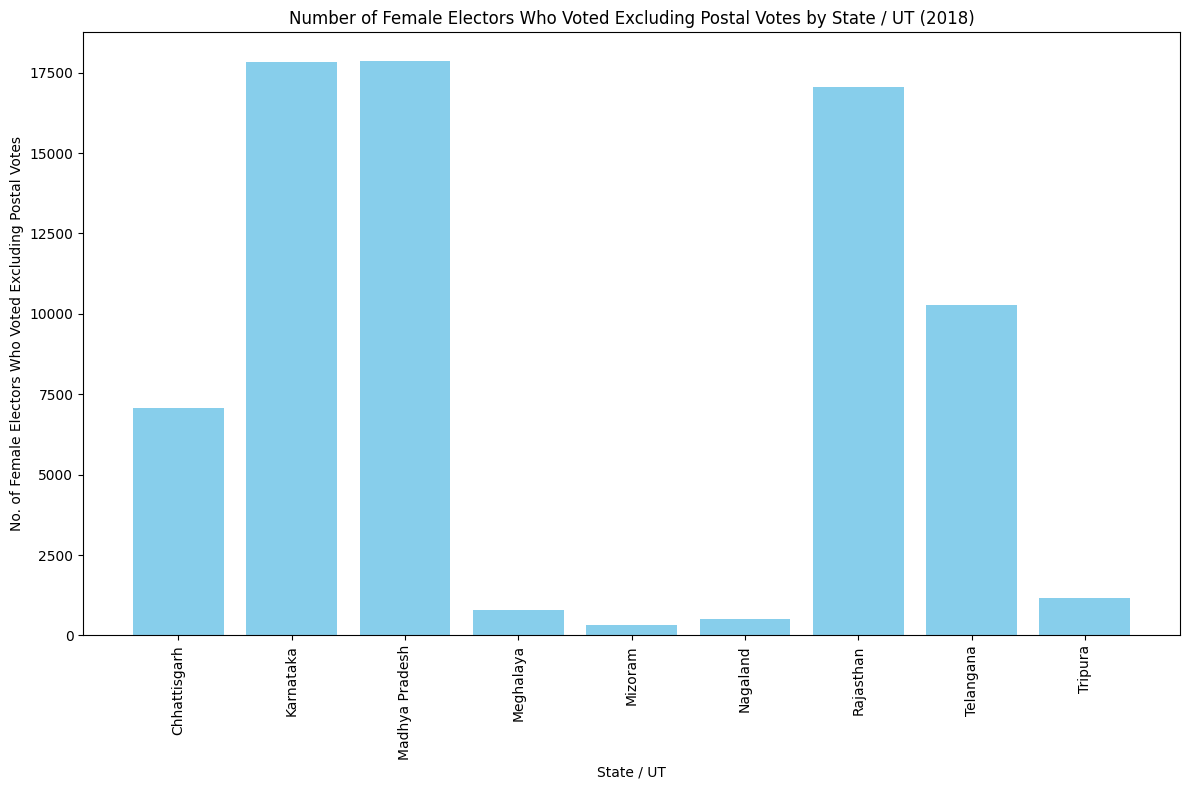

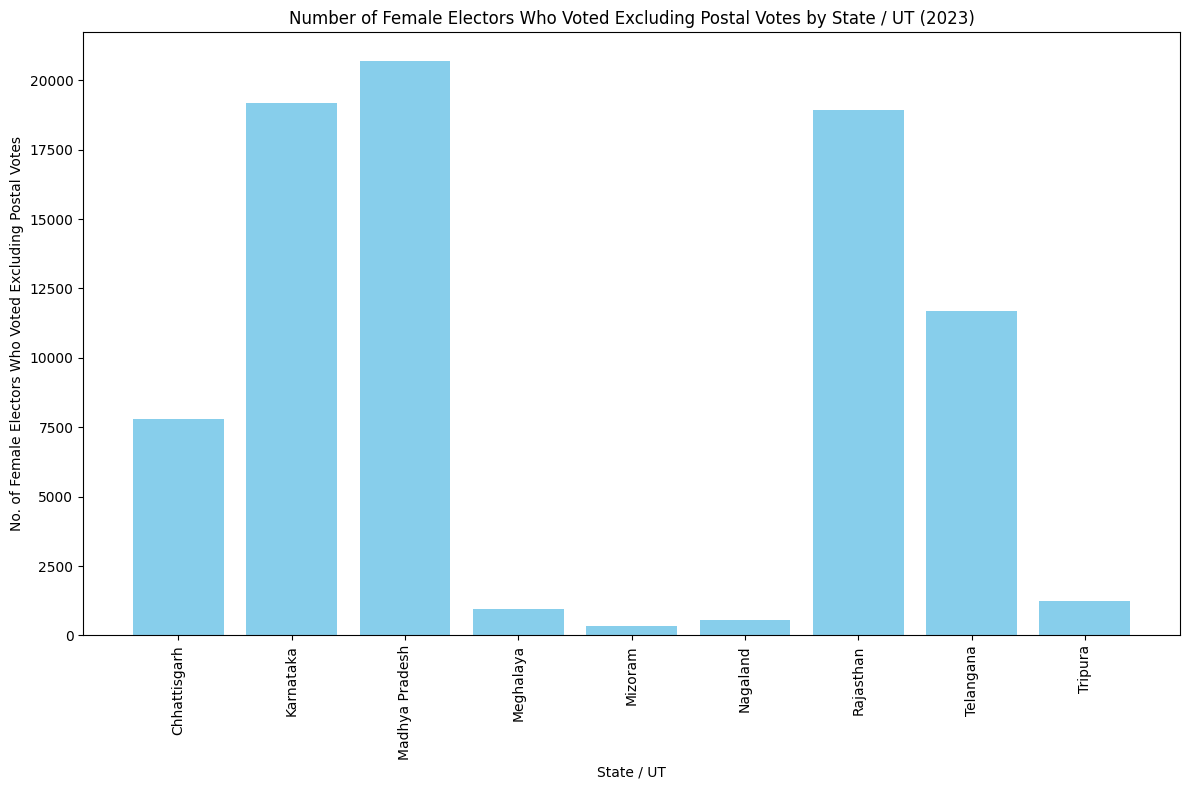

In [17]:
years_to_plot = list(range(2008, 2024, 5))

for year in years_to_plot:
    # Filter data for the specific year
    data_year = df[df['Year of GE to SLA'] == year]

    # Extract relevant columns
    state = data_year['State / UT']
    female_electors_voted = data_year['Female Electors Who Voted ']

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.bar(state, female_electors_voted, color='skyblue')
    plt.xlabel('State / UT')
    plt.ylabel('No. of Female Electors Who Voted Excluding Postal Votes')
    plt.title(f'Number of Female Electors Who Voted Excluding Postal Votes by State / UT ({year})')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

In [18]:
df['No of Polling Stations '].describe()

count       100.000000
mean      31906.670000
std       34901.873059
min         545.000000
25%        2924.500000
50%       21723.500000
75%       51870.500000
max      174803.000000
Name: No of Polling Stations , dtype: float64

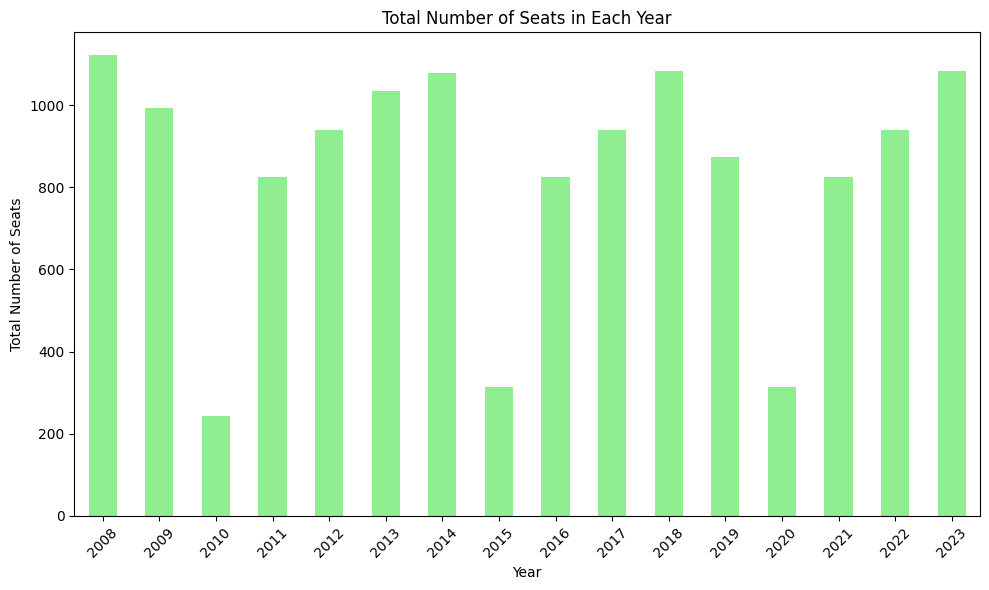

In [19]:
total_seats_per_year = df.groupby('Year of GE to SLA')['Total No. of Seats'].sum()

# Plotting
plt.figure(figsize=(10, 6))
total_seats_per_year.plot(kind='bar', color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Total Number of Seats')
plt.title('Total Number of Seats in Each Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

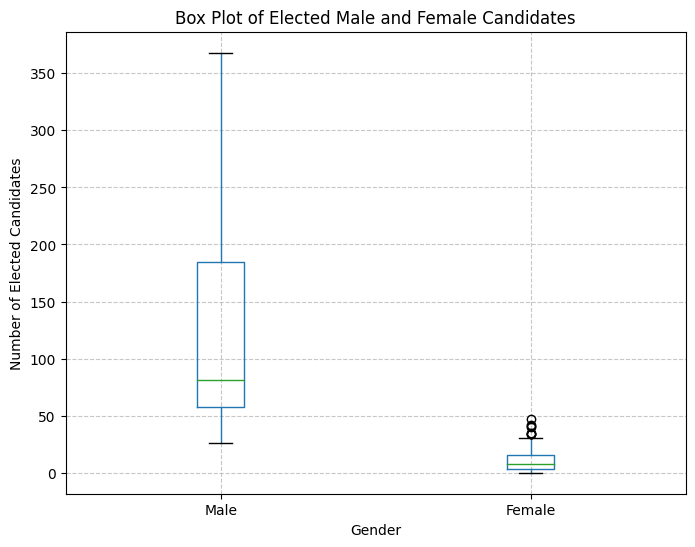

In [20]:
elected_male_candidates = df['Elected Male Candidates']
elected_female_candidates = df['Elected Female Candidates']

# Combine data into a single DataFrame
combined_data = pd.DataFrame({'Male': elected_male_candidates, 'Female': elected_female_candidates})

# Plotting
plt.figure(figsize=(8, 6))
combined_data.boxplot()
plt.title('Box Plot of Elected Male and Female Candidates')
plt.ylabel('Number of Elected Candidates')
plt.xlabel('Gender')
plt.xticks([1, 2], ['Male', 'Female'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

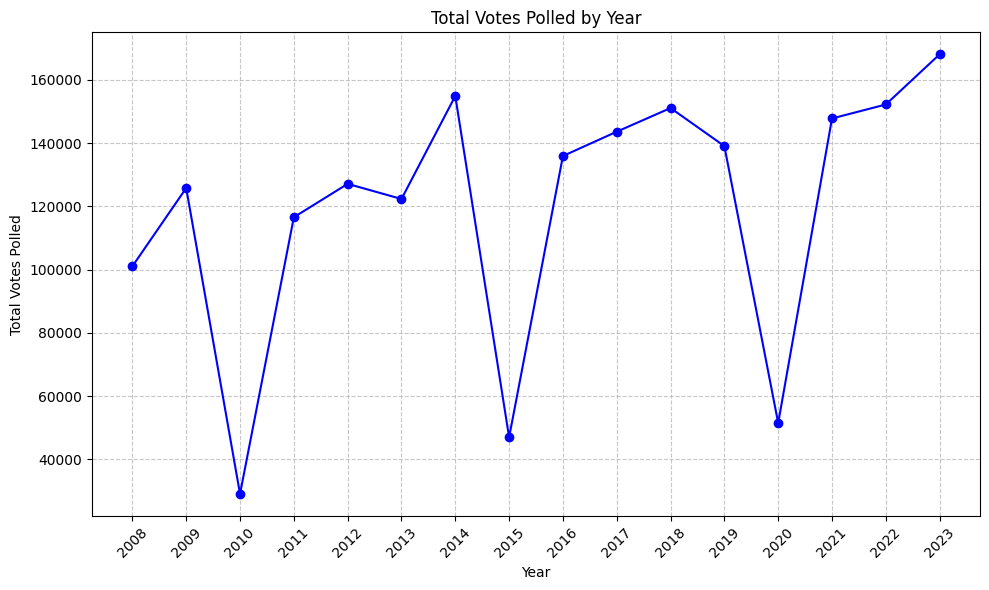

In [21]:
# Group the data by year and sum the number of contestants
total_candidates_by_year = df.groupby('Year of GE to SLA')['Total Votes Polled'].sum()

# Plotting
plt.figure(figsize=(10, 6))
total_candidates_by_year.plot(marker='o', color='blue', linestyle='-')
plt.title('Total Votes Polled by Year')
plt.xlabel('Year')
plt.ylabel('Total Votes Polled')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(total_candidates_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

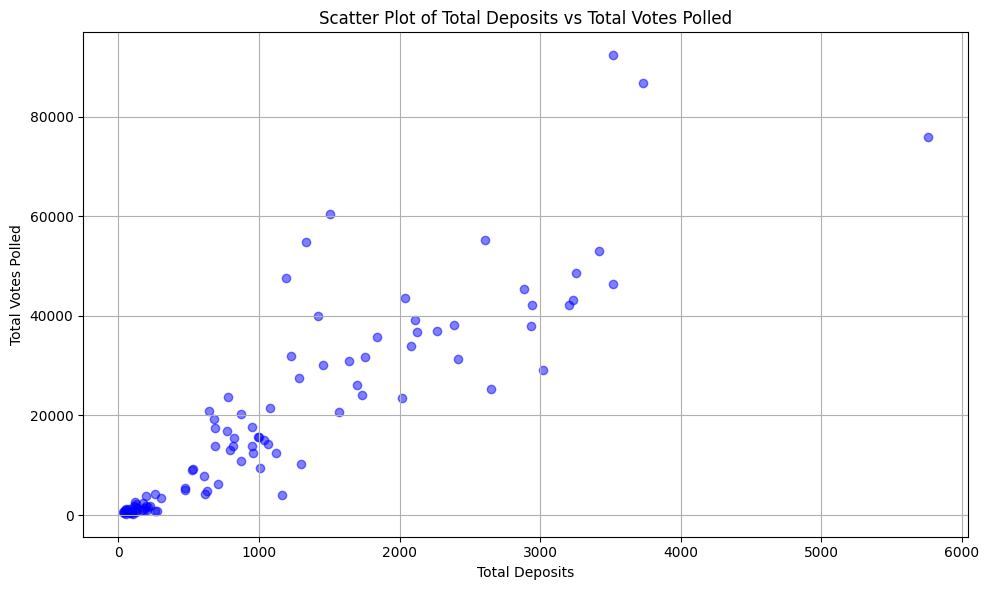

In [22]:
total_deposits = df['Total Deposits']
total_votes_polled = df['Total Votes Polled']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(total_deposits, total_votes_polled, color='blue', alpha=0.5)
plt.xlabel('Total Deposits')
plt.ylabel('Total Votes Polled')
plt.title('Scatter Plot of Total Deposits vs Total Votes Polled')
plt.grid(True)
plt.tight_layout()
plt.show()

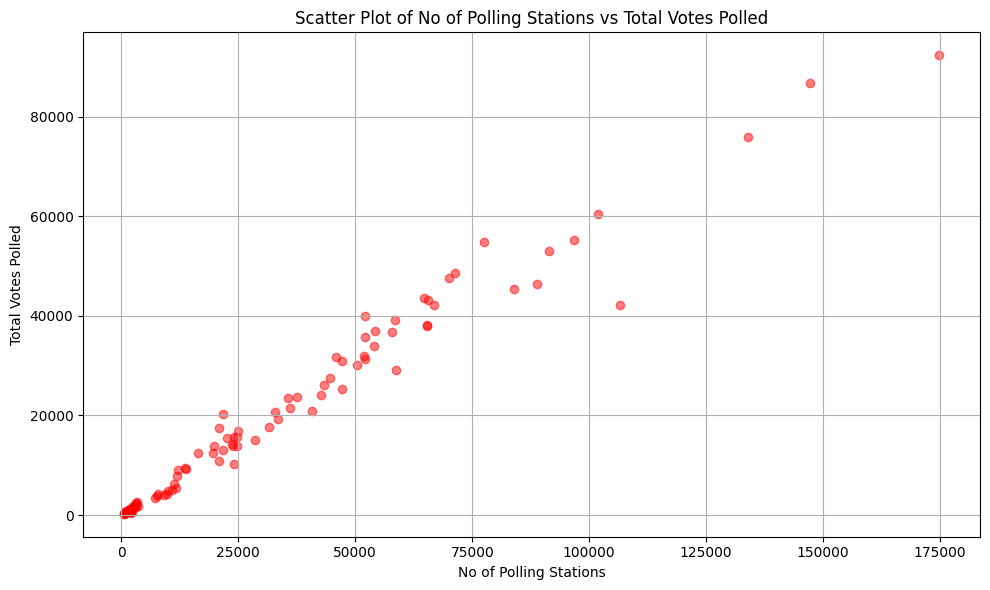

In [23]:
polling_stations = df['No of Polling Stations ']
total_votes_polled = df['Total Votes Polled']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(polling_stations, total_votes_polled, color='red', alpha=0.5)
plt.xlabel('No of Polling Stations')
plt.ylabel('Total Votes Polled')
plt.title('Scatter Plot of No of Polling Stations vs Total Votes Polled')
plt.grid(True)
plt.tight_layout()
plt.show()

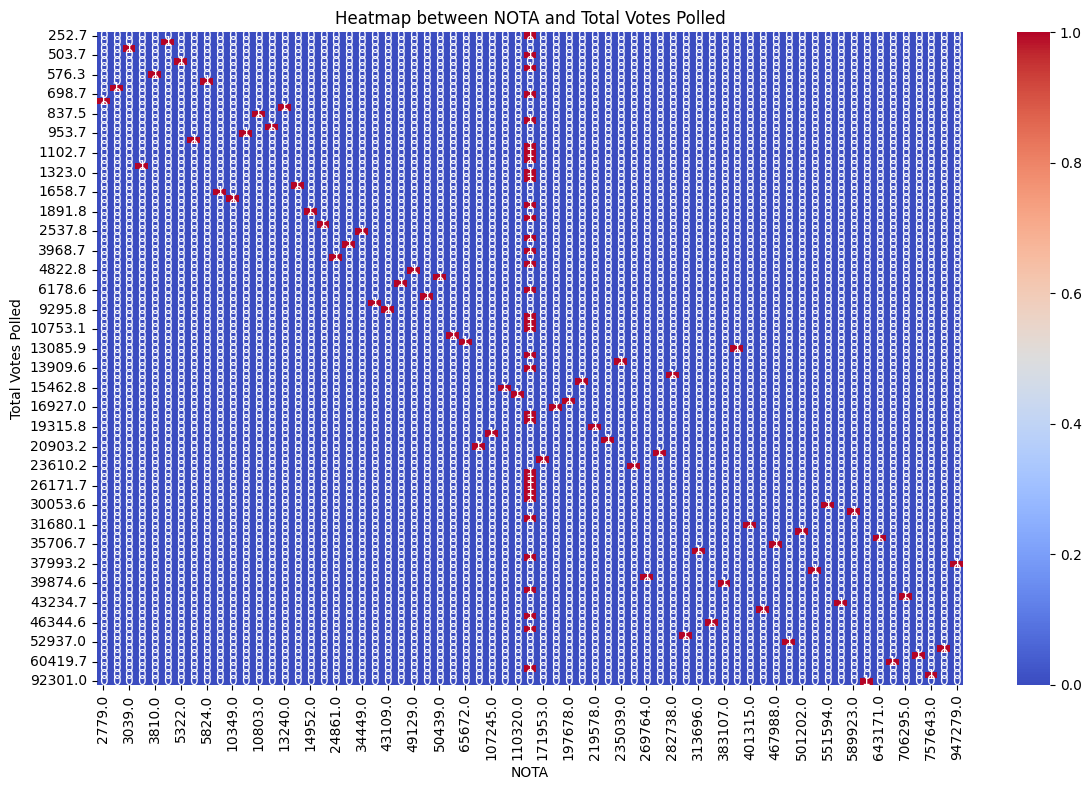

In [24]:
data_heatmap = df[['NOTA', 'Total Votes Polled']]

# Create a pivot table
heatmap_data = data_heatmap.pivot_table(index='Total Votes Polled', columns='NOTA', aggfunc=len, fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.xlabel('NOTA')
plt.ylabel('Total Votes Polled')
plt.title('Heatmap between NOTA and Total Votes Polled')
plt.tight_layout()
plt.show()

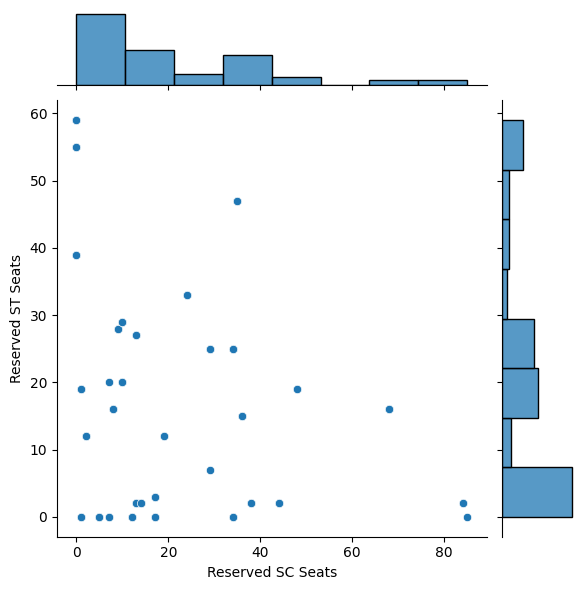

In [25]:
data_jointplot = df[['Reserved SC Seats', 'Reserved ST Seats']]

# Creating a joint plot
sns.jointplot(x='Reserved SC Seats', y='Reserved ST Seats', data=data_jointplot, kind='scatter')

# Show the plot
plt.show()

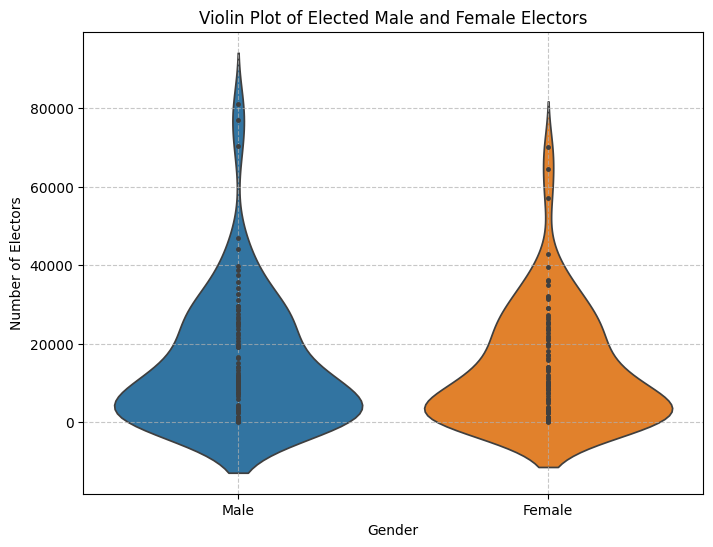

In [26]:
elected_male_candidates = df['Male Electors ']
elected_female_candidates = df['Female Electors ']

# Combine data into a single DataFrame
combined_data = pd.DataFrame({'Male': elected_male_candidates, 'Female': elected_female_candidates})

# Plotting
plt.figure(figsize=(8, 6))
sns.violinplot(data=combined_data, inner="point")
plt.title('Violin Plot of Elected Male and Female Electors')
plt.ylabel('Number of Electors')
plt.xlabel('Gender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

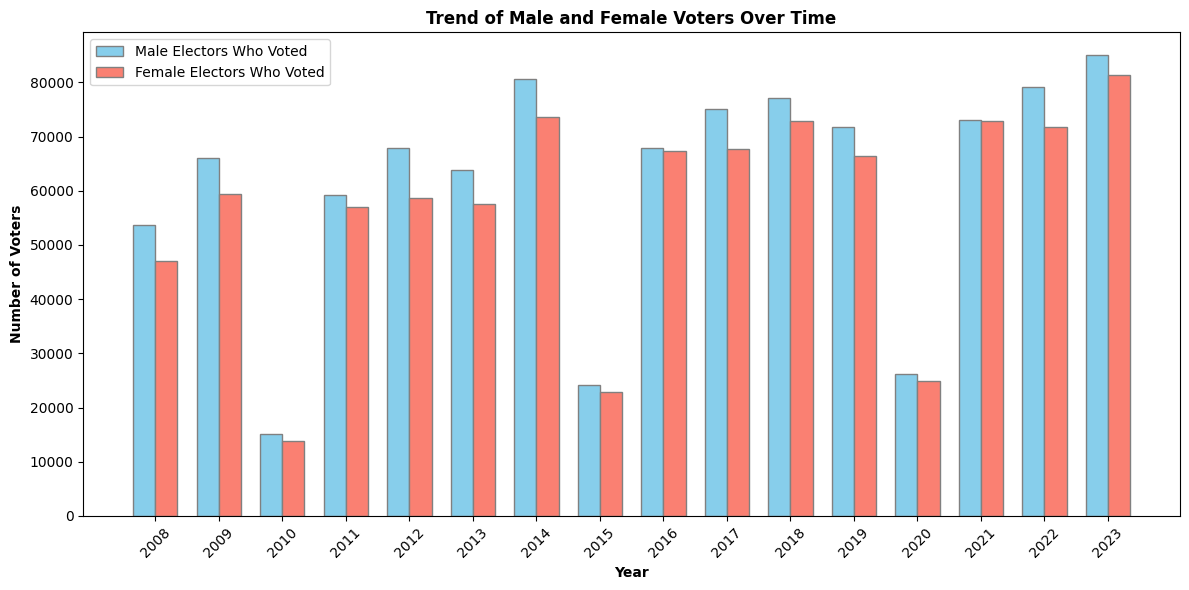

In [51]:
grouped_df = df.groupby('Year of GE to SLA').agg({'Male Electors Who Voted': 'sum', 'Female Electors Who Voted ': 'sum'})
years = grouped_df.index

# Setting the width of the bars
bar_width = 0.35

# Creating the position of bars on X-axis
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Plotting the double bar graph
plt.figure(figsize=(12, 6))
plt.bar(r1, grouped_df['Male Electors Who Voted'], color='skyblue', width=bar_width, edgecolor='grey', label='Male Electors Who Voted')
plt.bar(r2, grouped_df['Female Electors Who Voted '], color='salmon', width=bar_width, edgecolor='grey', label='Female Electors Who Voted')

# Adding labels and title
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Voters', fontweight='bold')
plt.title('Trend of Male and Female Voters Over Time', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(years))], years)
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing plot
plt.tight_layout()
plt.show()

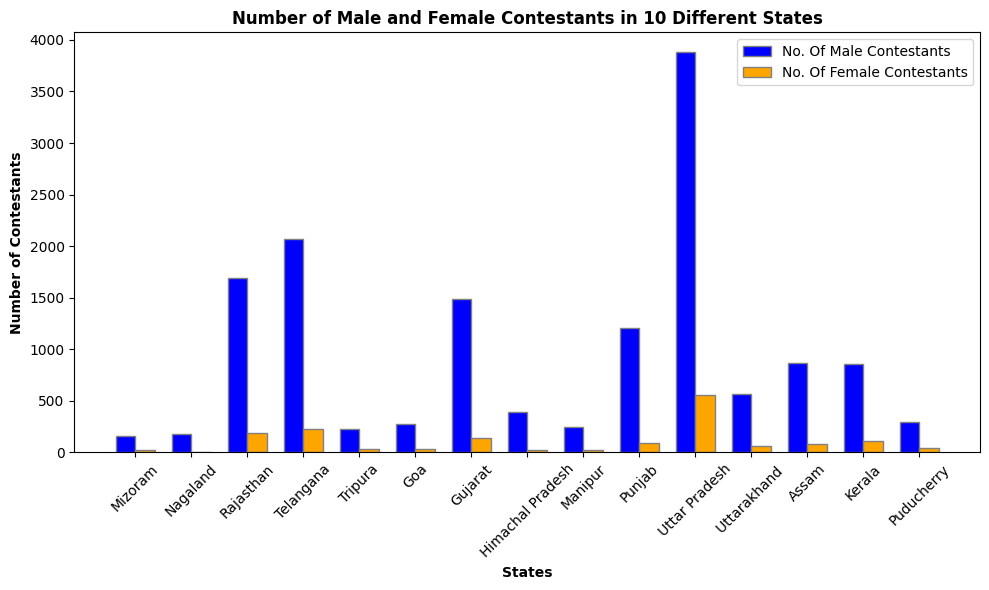

In [28]:
states = df['State / UT'][4:19]  # Assuming 'State' is the column representing states
male_contestants = df['No. Of Male Contestants'][4:19]
female_contestants = df['No. Of Female Contestants'][4:19]

# Setting the width of the bars
bar_width = 0.35

# Defining the position of bars on X-axis
r1 = range(len(states))
r2 = [x + bar_width for x in r1]

# Plotting the double bar graph
plt.figure(figsize=(10, 6))
plt.bar(r1, male_contestants, color='blue', width=bar_width, edgecolor='grey', label='No. Of Male Contestants')
plt.bar(r2, female_contestants, color='orange', width=bar_width, edgecolor='grey', label='No. Of Female Contestants')

# Adding labels and title
plt.xlabel('States', fontweight='bold')
plt.ylabel('Number of Contestants', fontweight='bold')
plt.title('Number of Male and Female Contestants in 10 Different States', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(states))], states)
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing plot
plt.tight_layout()
plt.show()

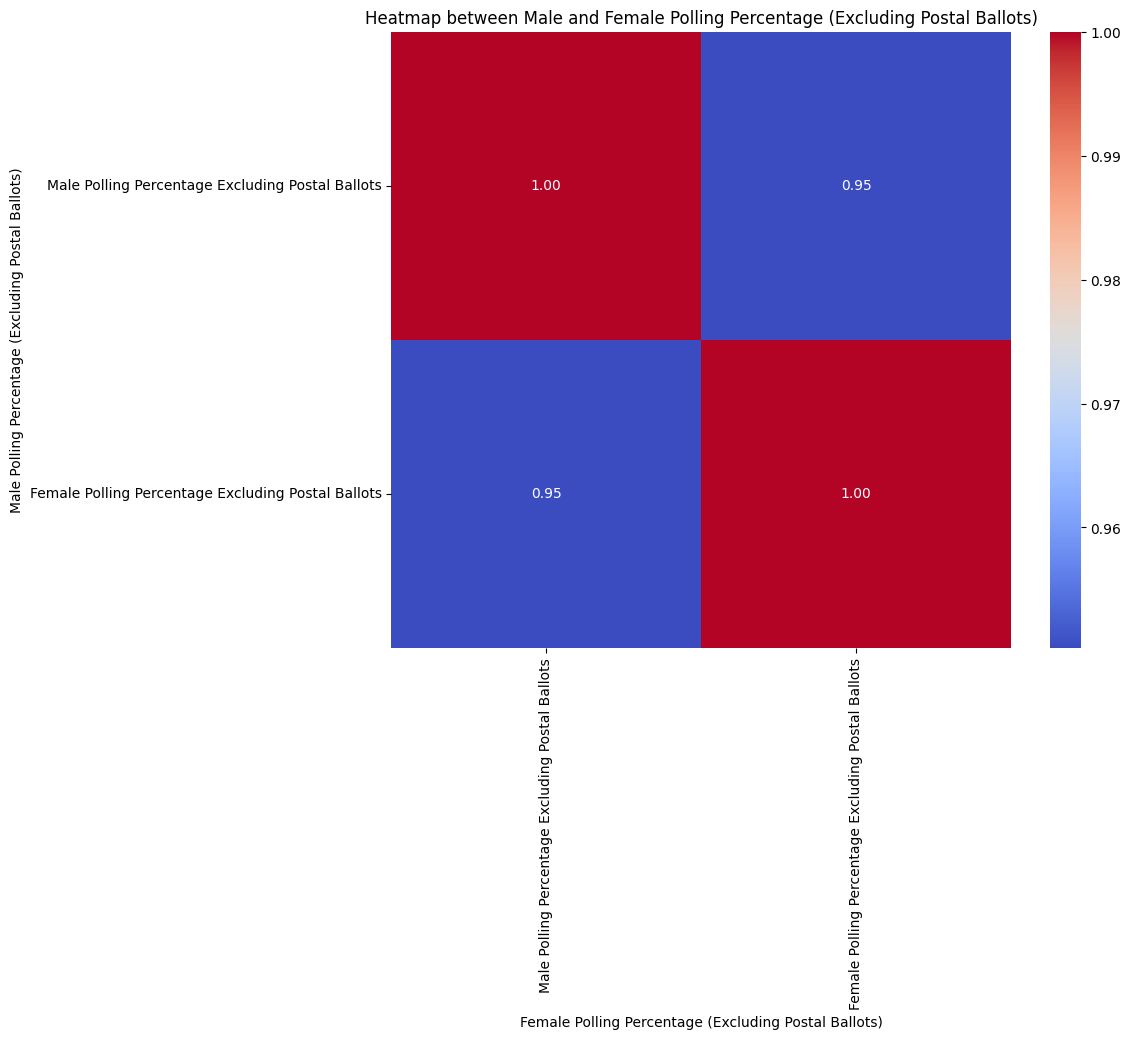

In [29]:
data_heatmap = df[['Male Polling Percentage Excluding Postal Ballots', 'Female Polling Percentage Excluding Postal Ballots']]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_heatmap.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap between Male and Female Polling Percentage (Excluding Postal Ballots)')
plt.xlabel('Female Polling Percentage (Excluding Postal Ballots)')
plt.ylabel('Male Polling Percentage (Excluding Postal Ballots)')
plt.show()

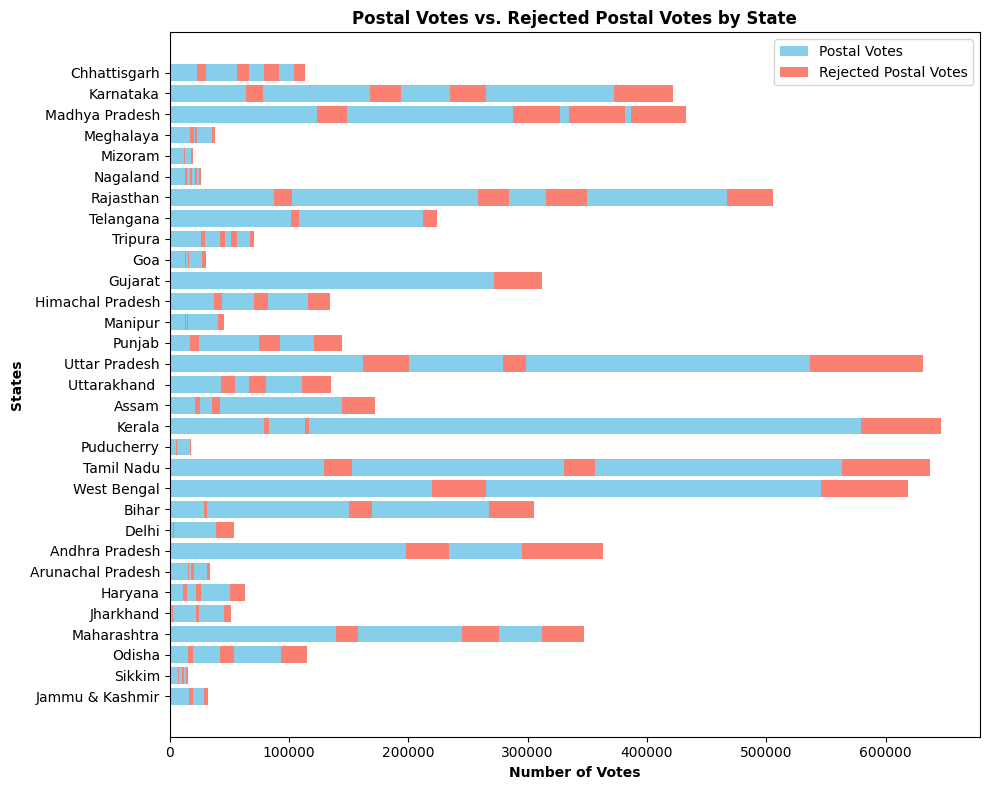

In [30]:
postal_votes = df['Postal Votes']
rejected_postal_votes = df['Rejected Postal Votes']
states = df['State / UT']  # Assuming 'State' is the column representing states

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(states, postal_votes, color='skyblue', label='Postal Votes')
plt.barh(states, rejected_postal_votes, color='salmon', label='Rejected Postal Votes', left=postal_votes)

# Adding labels and title
plt.xlabel('Number of Votes', fontweight='bold')
plt.ylabel('States', fontweight='bold')
plt.title('Postal Votes vs. Rejected Postal Votes by State', fontweight='bold')
plt.legend()

# Showing plot
plt.gca().invert_yaxis()  # Invert y-axis to have the top as the first state
plt.tight_layout()
plt.show()

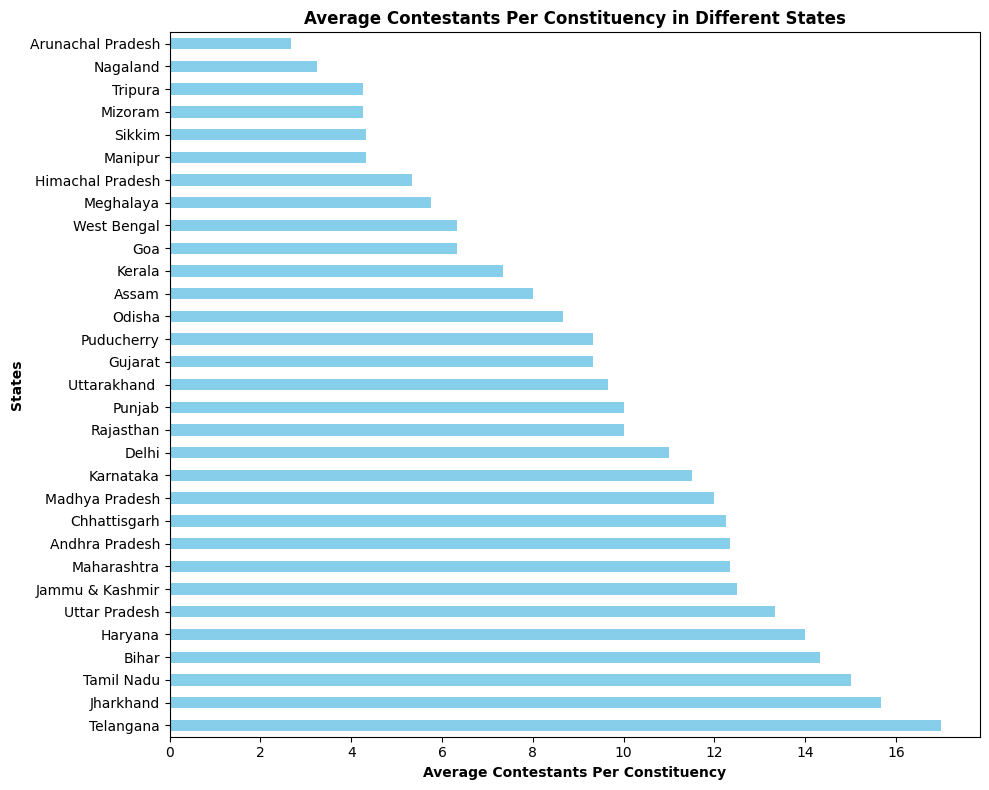

In [31]:
df['Average Contestants Per Constituency'] = pd.to_numeric(df['Average Contestants Per Constituency'], errors='coerce')

# Calculate average contestants per constituency for each state
average_contestants = df.groupby('State / UT')['Average Contestants Per Constituency'].mean().sort_values()

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
average_contestants.plot(kind='barh', color='skyblue')

# Adding labels and title
plt.xlabel('Average Contestants Per Constituency', fontweight='bold')
plt.ylabel('States', fontweight='bold')
plt.title('Average Contestants Per Constituency in Different States', fontweight='bold')

# Showing plot
plt.gca().invert_yaxis()  # Invert y-axis to have the top as the first state
plt.tight_layout()
plt.show()

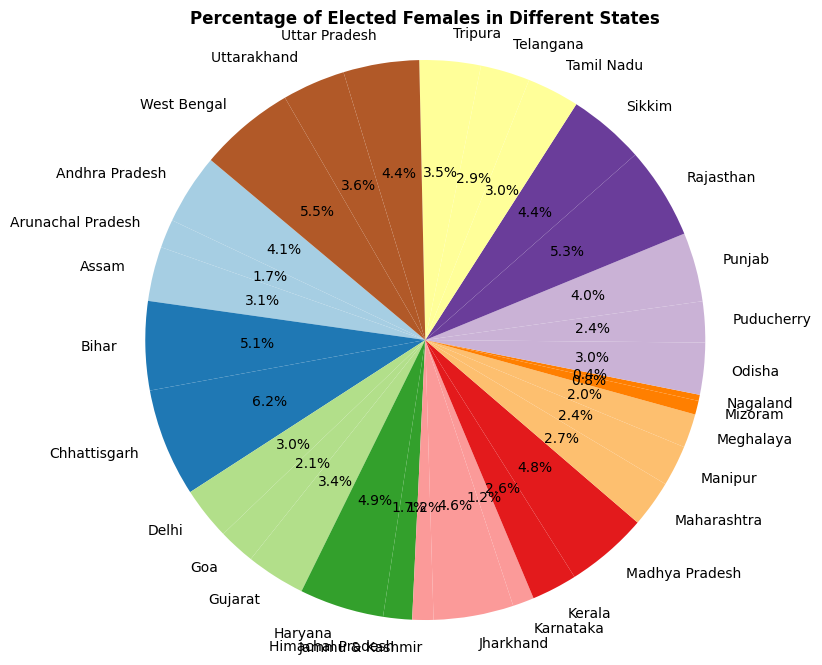

In [33]:
df['Elected Female Percentage'] = (df['Elected Female Candidates'] / df['Total number of Candidates']) * 100

# Group by state and calculate the mean of the percentage of elected females
average_female_percentage = df.groupby('State / UT')['Elected Female Percentage'].mean()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
average_female_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Paired')
plt.title('Percentage of Elected Females in Different States', fontweight='bold')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [40]:

# 1. Representation of Transgender Contestants
total_transgender_contestants = df['No. Of Transgender Contestants'].sum()
print("Total number of transgender contestants:", total_transgender_contestants)

# 2. Election Success Rate for Transgender Candidates
total_elected_transgender_candidates = df['Elected Transgender Candidates'].sum()
election_success_rate_transgender = (total_elected_transgender_candidates / total_transgender_contestants) * 100
print("Election success rate for transgender candidates: {:.2f}%".format(election_success_rate_transgender))

# 3. Forfeited Deposits by Transgender Candidates
total_forfeited_deposits_transgender = df['Forfeited Deposits Transgender'].sum()
print("Total number of forfeited deposits by transgender candidates:", total_forfeited_deposits_transgender)

# 4. Comparison with Other Candidate Groups
total_male_contestants = df['No. Of Male Contestants'].sum()
total_female_contestants = df['No. Of Female Contestants'].sum()

election_success_rate_male = (df['Elected Male Candidates'].sum() / total_male_contestants) * 100
election_success_rate_female = (df['Elected Female Candidates'].sum() / total_female_contestants) * 100

print("Election success rate for male candidates: {:.2f}%".format(election_success_rate_male))
print("Election success rate for female candidates: {:.2f}%".format(election_success_rate_female))

# 5. Geographical Distribution
geographical_distribution_transgender = df.groupby('State / UT')[['No. Of Transgender Contestants', 'Elected Transgender Candidates']].sum()
print("Geographical distribution of transgender contestants and elected candidates:")
print(geographical_distribution_transgender)


Total number of transgender contestants: 46.0
Election success rate for transgender candidates: 0.00%
Total number of forfeited deposits by transgender candidates: 45.0
Election success rate for male candidates: 9.26%
Election success rate for female candidates: 9.50%
Geographical distribution of transgender contestants and elected candidates:
                   No. Of Transgender Contestants  \
State / UT                                          
Andhra Pradesh                                3.0   
Arunachal Pradesh                             0.0   
Assam                                         0.0   
Bihar                                         1.0   
Chhattisgarh                                  7.0   
Delhi                                         1.0   
Goa                                           0.0   
Gujarat                                       0.0   
Haryana                                       0.0   
Himachal Pradesh                              0.0   
Jammu & Kashmir   

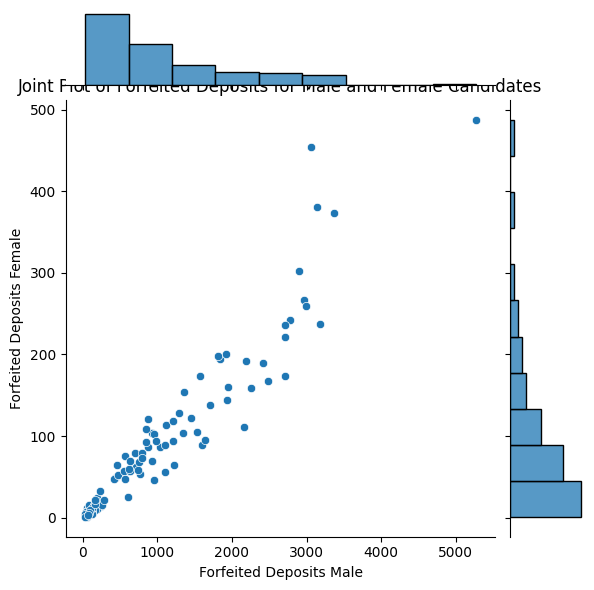

In [41]:
data_jointplot = df[['Forfeited Deposits Male', 'Forfeited Deposits Female']]

# Creating a joint plot
sns.jointplot(x='Forfeited Deposits Male', y='Forfeited Deposits Female', data=data_jointplot, kind='scatter')

# Adding labels and title
plt.xlabel('Forfeited Deposits Male')
plt.ylabel('Forfeited Deposits Female')
plt.title('Joint Plot of Forfeited Deposits for Male and Female Candidates')

# Showing plot
plt.show()

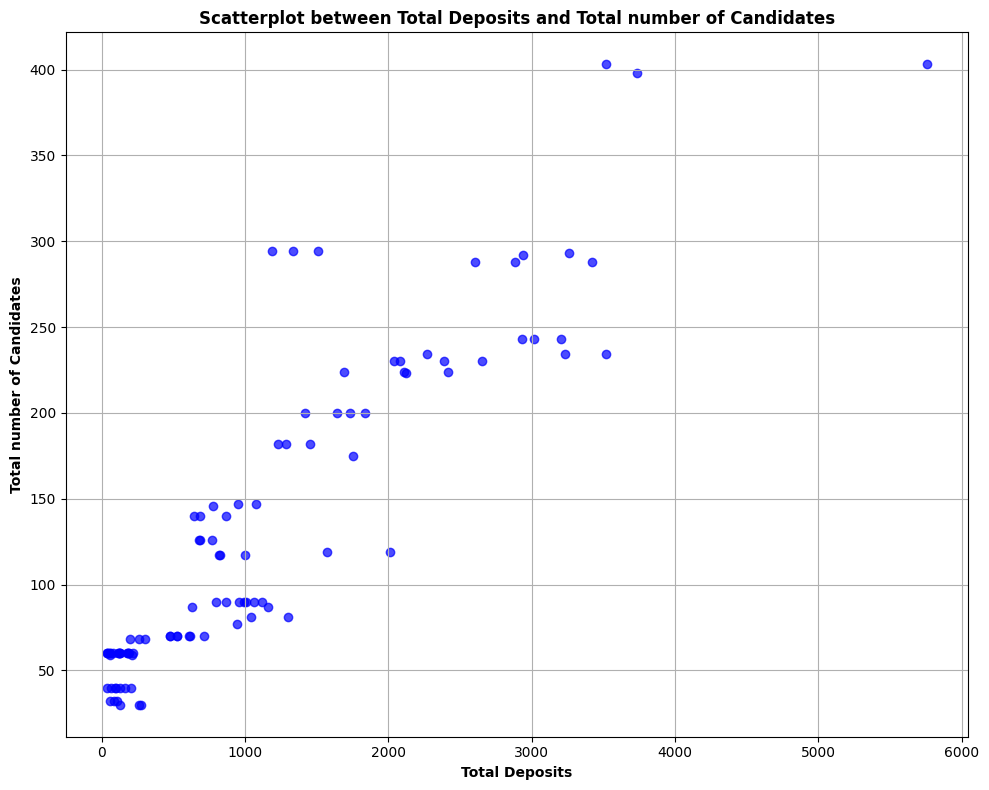

In [42]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Total Deposits'], df['Total number of Candidates'], color='blue', alpha=0.7)

# Adding labels and title
plt.xlabel('Total Deposits', fontweight='bold')
plt.ylabel('Total number of Candidates', fontweight='bold')
plt.title('Scatterplot between Total Deposits and Total number of Candidates', fontweight='bold')

# Showing plot
plt.grid(True)
plt.tight_layout()
plt.show()

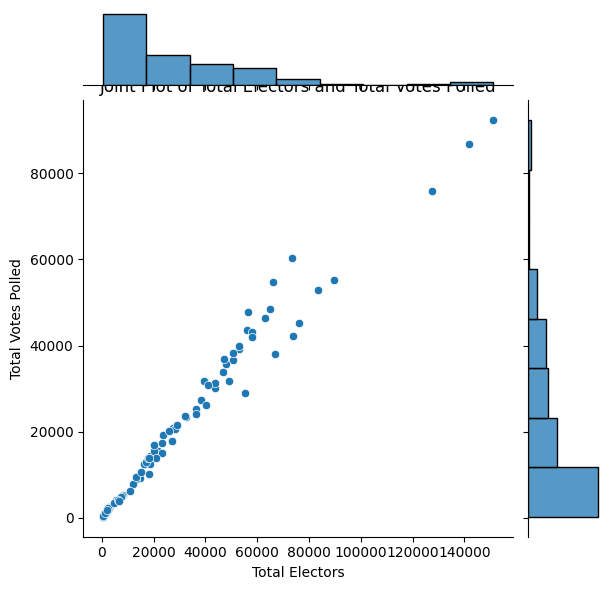

In [43]:
data_jointplot = df[['Total Electors', 'Total Votes Polled']]

# Creating a joint plot
sns.jointplot(x='Total Electors', y='Total Votes Polled', data=data_jointplot, kind='scatter')

# Adding labels and title
plt.xlabel('Total Electors')
plt.ylabel('Total Votes Polled')
plt.title('Joint Plot of Total Electors and Total Votes Polled')

# Showing plot
plt.show()

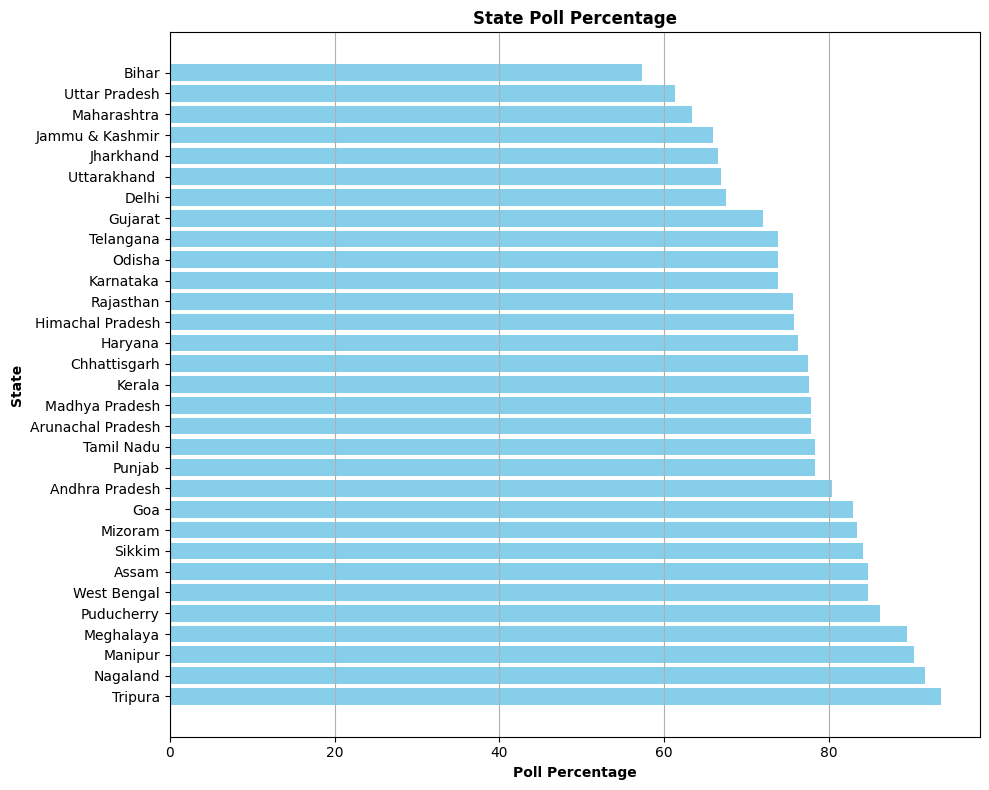

In [53]:
df['Poll Percentage'] = (df['Total Votes Polled'] / df['Total Electors']) * 100

# Sorting the DataFrame by poll percentage in descending order
df_sorted = df.sort_values(by='Poll Percentage', ascending=False)

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['State / UT'], df_sorted['Poll Percentage'], color='skyblue')

# Adding labels and title
plt.xlabel('Poll Percentage', fontweight='bold')
plt.ylabel('State', fontweight='bold')
plt.title('State Poll Percentage', fontweight='bold')

# Showing plot
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

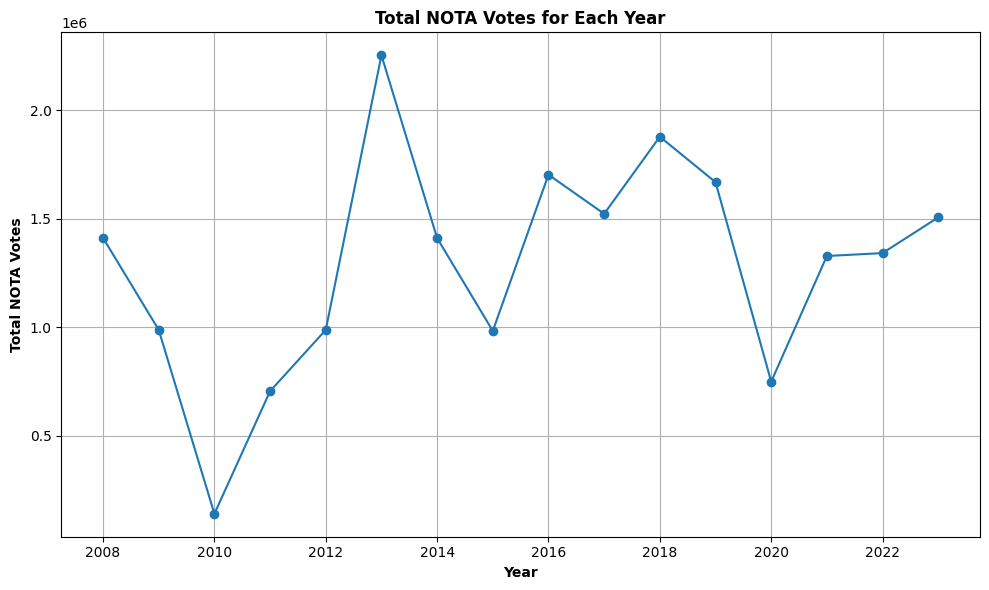

In [54]:
nota_by_year = df.groupby('Year of GE to SLA')['NOTA'].sum()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(nota_by_year.index, nota_by_year.values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total NOTA Votes', fontweight='bold')
plt.title('Total NOTA Votes for Each Year', fontweight='bold')

# Showing plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
df.head()

,State / UT,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestants,No. Of Transgender Contestants,Total number of contestents,Elected Male Candidates,...,Total Votes Polled,Male Polling Percentage Excluding Postal Ballots,Female Polling Percentage Excluding Postal Ballots,State Poll perc,No of Polling Stations,Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA,Elected Female Percentage
0,Chhattisgarh,2023,10,29,90,1025,155,1.0,1181,71,...,15666.5,76.3,76.2,76.8,24137,846,103861,9732,197678.0,21.111111
1,Karnataka,2023,36,15,224,2429,185,1.0,2615,214,...,39229.9,73.6,72.7,73.8,58534,908,372516,49280,269764.0,4.464286
2,Madhya Pradesh,2023,35,47,230,2281,252,1.0,2534,203,...,43580.9,78.0,76.1,77.7,64626,867,386479,46125,427710.0,11.739130
3,Meghalaya,2023,0,55,60,339,36,0.0,375,57,...,1891.8,83.1,87.2,86.8,3482,626,35260,2510,14952.0,5.000000
4,Mizoram,2023,0,39,40,156,18,0.0,174,37,...,705.1,79.0,81.3,82.3,1276,672,17726,843,2779.0,7.500000


In [35]:
df.describe()

,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestants,No. Of Transgender Contestants,Total number of contestents,Elected Male Candidates,Elected Female Candidates,...,Total Votes Polled,Male Polling Percentage Excluding Postal Ballots,Female Polling Percentage Excluding Postal Ballots,State Poll perc,No of Polling Stations,Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA,Elected Female Percentage
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2015.510000,19.860000,19.670000,134.260000,1324.51000,120.910000,0.460000,1445.880000,122.610000,11.490000,...,19133.396000,73.735000,74.800000,75.054000,31906.670000,796.320000,122192.980000,16422.610000,205755.200000,7.613036
std,4.823124,20.048436,18.784829,93.823886,1213.36329,120.426355,0.947298,1328.913229,84.044228,11.220017,...,20225.441302,8.725504,9.495751,9.427881,34901.873059,155.201263,142095.069556,19106.148057,212948.846818,4.269400
min,2008.000000,0.000000,0.000000,30.000000,110.00000,2.000000,0.000000,121.000000,26.000000,0.000000,...,252.700000,51.100000,54.500000,52.700000,545.000000,352.000000,2262.000000,191.000000,2779.000000,0.000000
25%,2012.000000,5.000000,2.000000,60.000000,286.50000,24.000000,0.000000,321.250000,58.000000,3.000000,...,1816.350000,67.475000,67.075000,67.475000,2924.500000,695.500000,17955.000000,2572.250000,49695.250000,4.687500
50%,2016.000000,13.000000,16.000000,90.000000,999.00000,92.000000,0.000000,1102.500000,81.000000,8.000000,...,13851.800000,74.050000,74.850000,75.600000,21723.500000,809.000000,51005.000000,7379.000000,141136.500000,7.678571
75%,2019.000000,34.000000,29.000000,206.000000,1957.50000,177.000000,1.000000,2147.500000,185.000000,15.250000,...,31455.850000,79.575000,81.850000,82.450000,51870.500000,897.500000,201545.000000,25850.000000,251233.750000,11.111111
max,2023.000000,85.000000,59.000000,403.000000,6252.00000,583.000000,5.000000,6839.000000,368.000000,47.000000,...,92301.000000,90.700000,92.900000,93.600000,174803.000000,1206.000000,579141.000000,94413.000000,947279.000000,21.111111


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   State / UT                                          100 non-null    object 
 1   Year of GE to SLA                                   100 non-null    int64  
 2   Reserved SC Seats                                   100 non-null    int64  
 3   Reserved ST Seats                                   100 non-null    int64  
 4   Total No. of Seats                                  100 non-null    int64  
 5   No. Of Male Contestants                             100 non-null    int64  
 6   No. Of Female Contestants                           100 non-null    int64  
 7   No. Of Transgender Contestants                      100 non-null    float64
 8   Total number of contestents                         100 non-null    int64  
 9   

# Feature Engineering and Model Training

RMSE: 4.330335578772196
R-squared: 0.7731453396469836


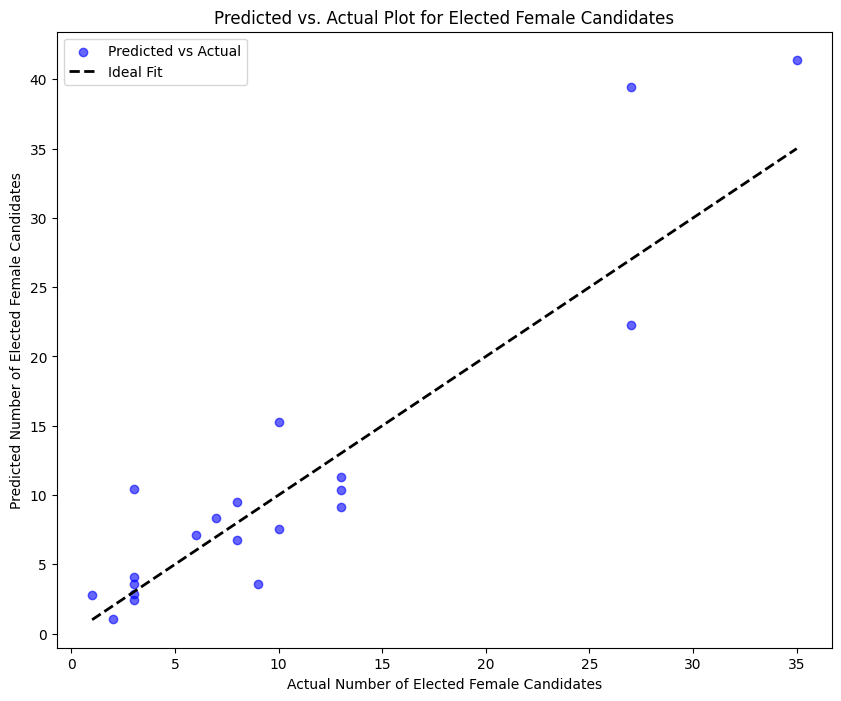

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Define the features and the target
X = df[['Total No. of Seats', 'No. Of Female Contestants', 'State / UT', 'Year of GE to SLA',
        'Total Electors', 'Female Electors ', 'Male Electors ', 'Reserved SC Seats', 'Reserved ST Seats']]
y = df['Elected Female Candidates']

# Preprocessing for numerical data
numerical_cols = [col for col in X.columns if df[col].dtype in ['int64', 'float64']]
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_cols = [col for col in X.columns if df[col].dtype == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', gbm_model)
                              ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
gbm_pipeline.fit(X_train, y_train)

# Get predictions
predictions = gbm_pipeline.predict(X_test)

# Evaluate the model using RMSE and R-squared
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

# Output RMSE and R-squared scores
print("RMSE:", rmse)
print("R-squared:", r2)


# Predicted vs. Actual Plot for Gradient Boosting Regressor
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Number of Elected Female Candidates')
plt.ylabel('Predicted Number of Elected Female Candidates')
plt.title('Predicted vs. Actual Plot for Elected Female Candidates')
plt.legend()
plt.show()



Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.85      0.85      0.85        13

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20

Top feature importances:
Average Contestants Per Constituency: 0.0370157650079419
Male Electors Who Voted: 0.04305013873249709
Average Number of Electors per PS: 0.0456737806381695
Total No. of Seats: 0.0460591969512914
Forfeited Deposits Male: 0.04613549471370587
No. Of Transgender Contestants: 0.04983148610664938
State Poll perc: 0.0546220609965763
Elected Female perc: 0.06305652008263522
Forfeited Deposits Transgender: 0.07041543448873168
State / UT: 0.12929923358756404


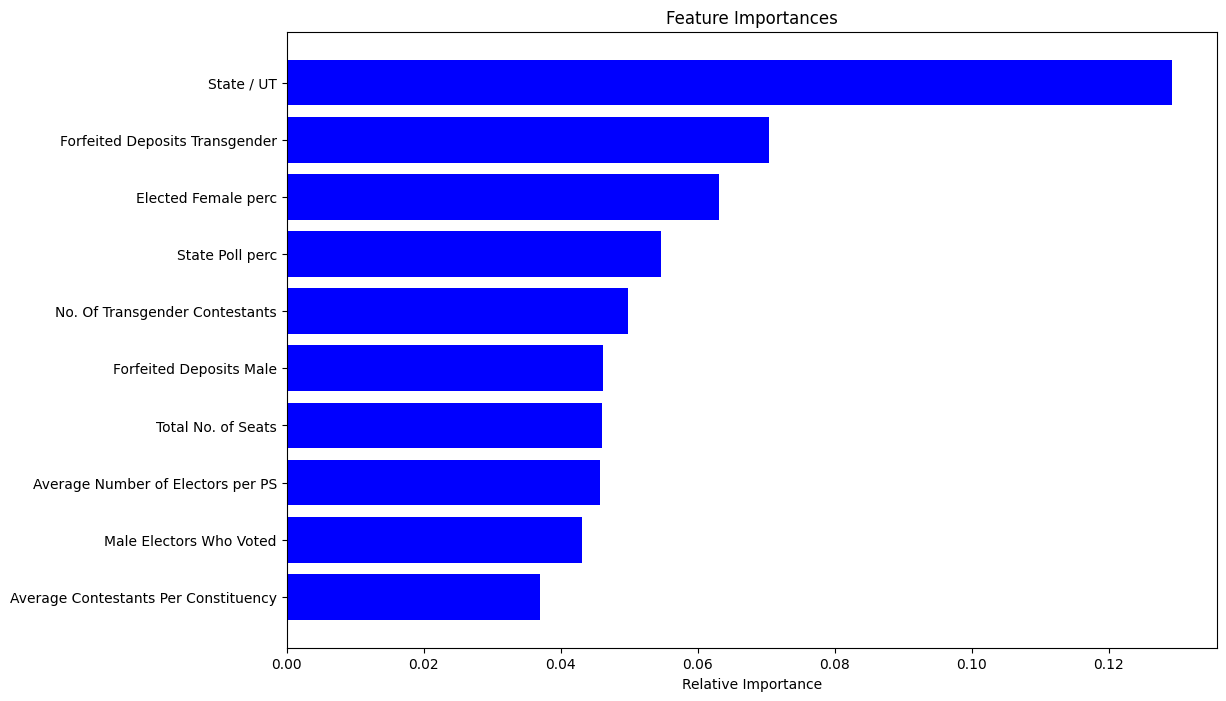

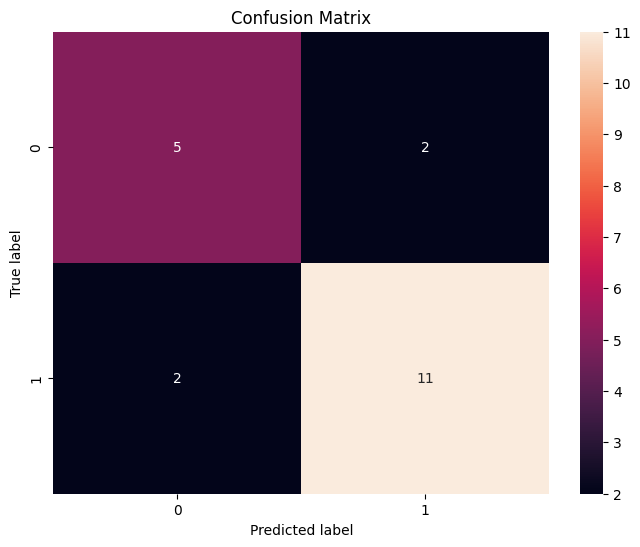

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np



# Define a threshold for high NOTA - let's use the median as an example
nota_threshold = df['NOTA'].median()

# Create the binary classification target based on the threshold
df['High_NOTA'] = (df['NOTA'] >= nota_threshold).astype(int)

# Define the features and the target
X = df.drop(['Total Votes Polled', 'NOTA', 'High_NOTA'], axis=1)
y = df['High_NOTA']

# Preprocessing for numerical data
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing of training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Fit the model on the training data and get feature importances
rf_classifier.fit(X_train_preprocessed, y_train)
importances = rf_classifier.feature_importances_

indices = np.argsort(importances)[-10:]  # Just as an example, getting the top 10 features


# Get predictions
preds = rf_classifier.predict(X_test_preprocessed)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
classification_rep = classification_report(y_test, preds)

# Output the accuracy and the classification report for the test set
print(f'Accuracy: {accuracy}')
print(classification_rep)

# Output the feature importances for the top features
print("Top feature importances:")
for i in indices:
    print(f"{X.columns[i]}: {importances[i]}")

plt.figure(figsize=(12, 8))
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Generate a Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



Top-left quadrant (True Negative): The number 5 indicates that there are five instances where the model correctly predicted the negative class (e.g., 'Low NOTA').
Top-right quadrant (False Positive): The number 2 shows that the model incorrectly predicted the positive class (e.g., 'High NOTA') two times when it was actually the negative class.
Bottom-left quadrant (False Negative): The number 0 indicates that there are no instances where the model predicted the negative class when it was actually the positive class.
Bottom-right quadrant (True Positive): The number 13 signifies that the model correctly predicted the positive class 13 times.